# Impedance Comparison: Reference vs Python Implementation

This notebook compares the impedance calculations between:
- `test.imp` - Reference implementation
- `test_pycalcimp.imp` - Python binding implementation

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Load Data

In [21]:
# Load reference data
ref_data = pd.read_csv('../sample/test.imp')
print("Reference data shape:", ref_data.shape)
print("\nReference data columns:", ref_data.columns.tolist())
print("\nFirst few rows:")
ref_data.head()

Reference data shape: (801, 4)

Reference data columns: ['freq', 'imp.real', 'imp.imag', 'mag']

First few rows:


,freq,imp.real,imp.imag,mag
0,0.0,0.000000,0.000000,0.000000
1,2.5,3.202246,22.476099,27.121692
2,5.0,4.791645,42.934722,32.709931
3,7.5,6.079258,63.216127,36.056536
4,10.0,7.241407,83.596881,38.476267


In [22]:
# Load Python implementation data
py_data = pd.read_csv('test_pycalcimp.imp')
print("Python data shape:", py_data.shape)
print("\nPython data columns:", py_data.columns.tolist())
print("\nFirst few rows:")
py_data.head()

Python data shape: (801, 4)

Python data columns: ['freq', 'imp.real', 'imp.imag', 'mag']

First few rows:


,freq,imp.real,imp.imag,mag
0,0.0,0.000000,0.000000,0.000000
1,2.5,3.202420,22.680223,27.198680
2,5.0,4.792642,43.346197,32.791791
3,7.5,6.082052,63.841155,36.141254
4,10.0,7.247278,84.444758,38.563325


## Plot Frequency vs Magnitude Comparison

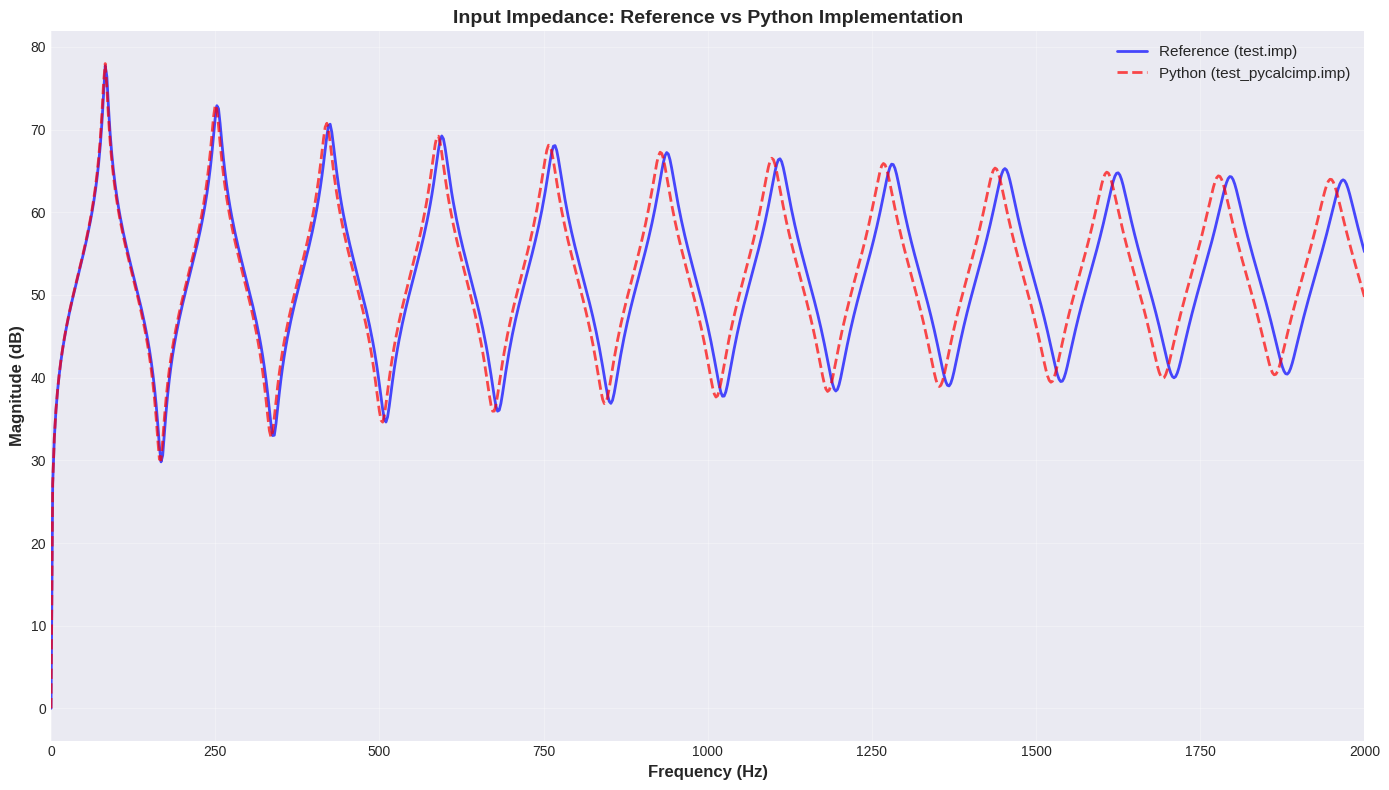

Plot saved as: impedance_comparison_full.png


In [ ]:
# Create main comparison plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plot both curves
ax.plot(ref_data['freq'], ref_data['mag'], 'b-', linewidth=2, label='Reference (test.imp)', alpha=0.7)
ax.plot(py_data['freq'], py_data['mag'], 'r--', linewidth=2, label='Python (test_pycalcimp.imp)', alpha=0.7)

# Labels and title
ax.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax.set_ylabel('Magnitude (dB)', fontsize=12, fontweight='bold')
ax.set_title('Input Impedance: Reference vs Python Implementation', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)

# Set axis limits
ax.set_xlim(0, 2000)

plt.tight_layout()
# plt.savefig('impedance_comparison_full.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Plot saved as: impedance_comparison_full.png")

## Zoomed View: Peak Region (60-120 Hz)

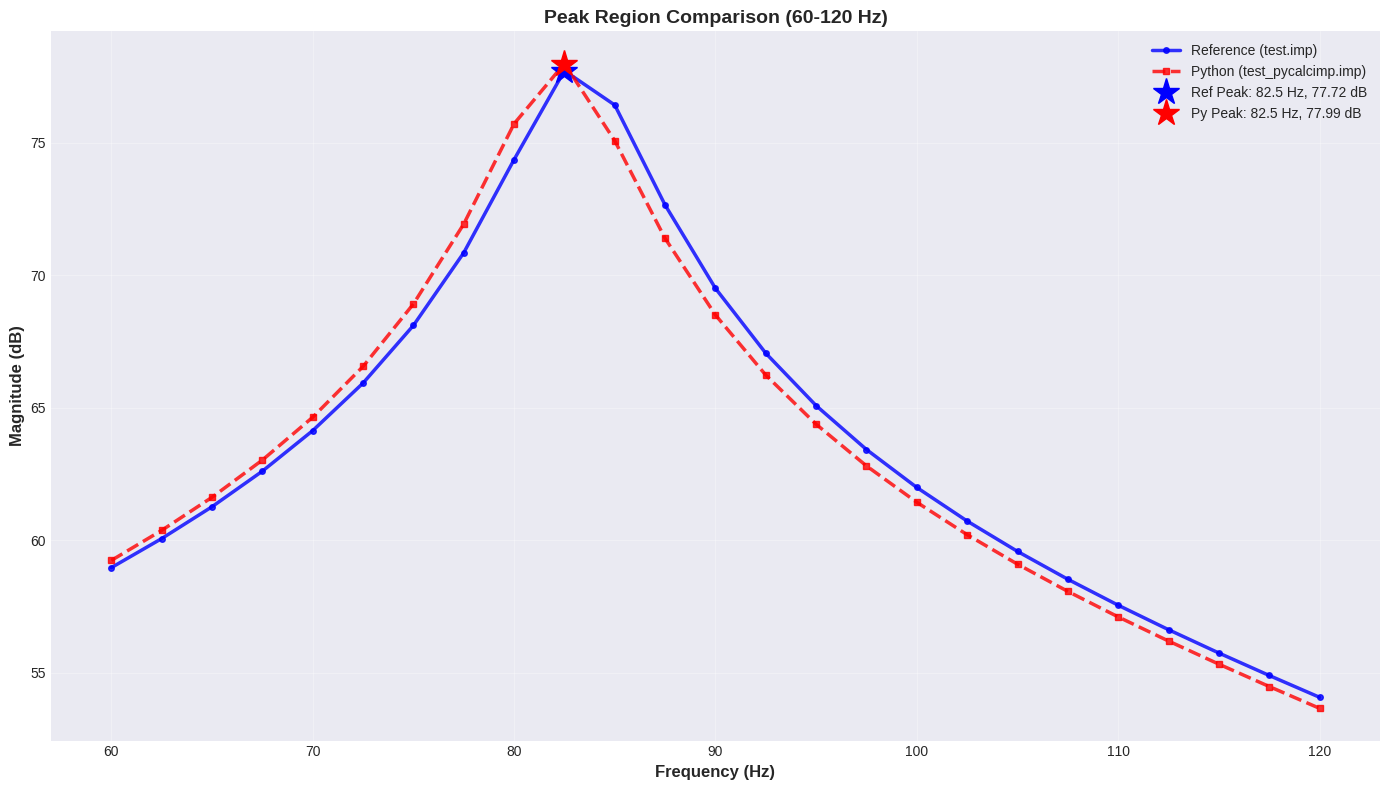

Plot saved as: impedance_comparison_peak.png


In [ ]:
# Create zoomed plot around the peak
fig, ax = plt.subplots(figsize=(14, 8))

# Filter data for zoom region
zoom_range = (ref_data['freq'] >= 60) & (ref_data['freq'] <= 120)
zoom_range_py = (py_data['freq'] >= 60) & (py_data['freq'] <= 120)

# Plot both curves
ax.plot(ref_data.loc[zoom_range, 'freq'], ref_data.loc[zoom_range, 'mag'], 
        'b-', linewidth=2.5, label='Reference (test.imp)', alpha=0.8, marker='o', markersize=4)
ax.plot(py_data.loc[zoom_range_py, 'freq'], py_data.loc[zoom_range_py, 'mag'], 
        'r--', linewidth=2.5, label='Python (test_pycalcimp.imp)', alpha=0.8, marker='s', markersize=4)

# Find and mark peaks
ref_peak_idx = ref_data.loc[zoom_range, 'mag'].idxmax()
py_peak_idx = py_data.loc[zoom_range_py, 'mag'].idxmax()

ax.plot(ref_data.loc[ref_peak_idx, 'freq'], ref_data.loc[ref_peak_idx, 'mag'], 
        'b*', markersize=20, label=f'Ref Peak: {ref_data.loc[ref_peak_idx, "freq"]:.1f} Hz, {ref_data.loc[ref_peak_idx, "mag"]:.2f} dB')
ax.plot(py_data.loc[py_peak_idx, 'freq'], py_data.loc[py_peak_idx, 'mag'], 
        'r*', markersize=20, label=f'Py Peak: {py_data.loc[py_peak_idx, "freq"]:.1f} Hz, {py_data.loc[py_peak_idx, "mag"]:.2f} dB')

# Labels and title
ax.set_xlabel('Frequency (Hz)', fontsize=12, fontweight='bold')
ax.set_ylabel('Magnitude (dB)', fontsize=12, fontweight='bold')
ax.set_title('Peak Region Comparison (60-120 Hz)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('impedance_comparison_peak.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Plot saved as: impedance_comparison_peak.png")

## Calculate and Plot Differences

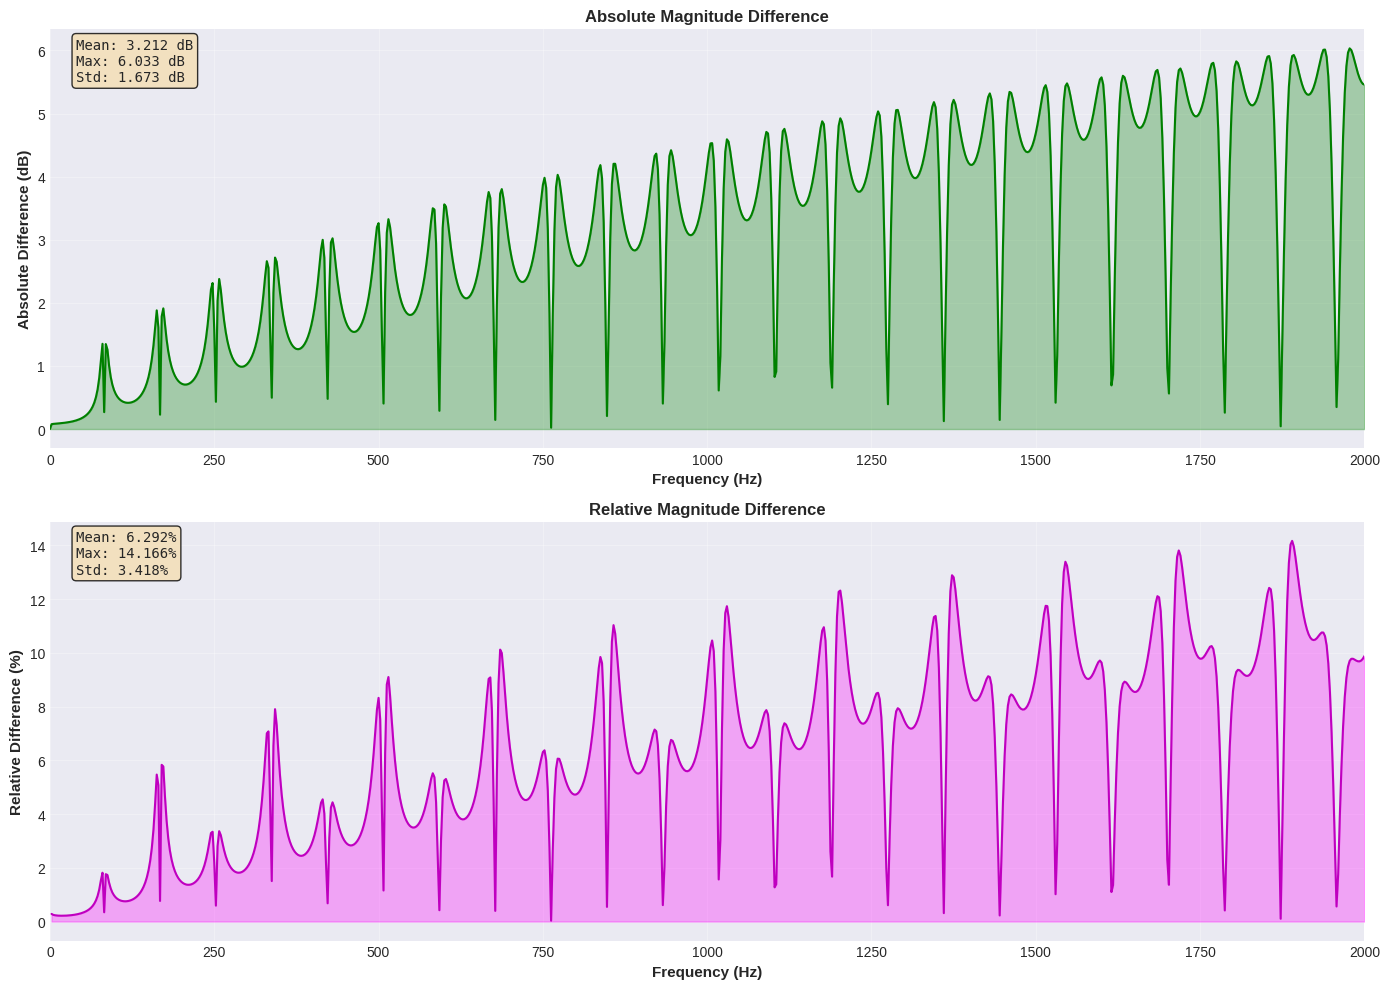

Plot saved as: impedance_difference.png


In [ ]:
# Calculate absolute and relative differences
abs_diff = np.abs(ref_data['mag'] - py_data['mag'])
rel_diff = abs_diff / np.abs(ref_data['mag']) * 100  # Percentage

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot absolute difference
ax1.plot(ref_data['freq'], abs_diff, 'g-', linewidth=1.5)
ax1.fill_between(ref_data['freq'], 0, abs_diff, alpha=0.3, color='green')
ax1.set_xlabel('Frequency (Hz)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Absolute Difference (dB)', fontsize=11, fontweight='bold')
ax1.set_title('Absolute Magnitude Difference', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 2000)

# Add statistics text
stats_text = f"Mean: {abs_diff.mean():.3f} dB\nMax: {abs_diff.max():.3f} dB\nStd: {abs_diff.std():.3f} dB"
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10, fontfamily='monospace')

# Plot relative difference
ax2.plot(ref_data['freq'], rel_diff, 'm-', linewidth=1.5)
ax2.fill_between(ref_data['freq'], 0, rel_diff, alpha=0.3, color='magenta')
ax2.set_xlabel('Frequency (Hz)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Relative Difference (%)', fontsize=11, fontweight='bold')
ax2.set_title('Relative Magnitude Difference', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 2000)

# Add statistics text
stats_text2 = f"Mean: {rel_diff.mean():.3f}%\nMax: {rel_diff.max():.3f}%\nStd: {rel_diff.std():.3f}%"
ax2.text(0.02, 0.98, stats_text2, transform=ax2.transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10, fontfamily='monospace')

plt.tight_layout()
# plt.savefig('impedance_difference.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Plot saved as: impedance_difference.png")

## Statistical Summary

In [26]:
print("="*70)
print("STATISTICAL COMPARISON SUMMARY")
print("="*70)
print(f"\nNumber of data points: {len(ref_data)}")
print(f"Frequency range: {ref_data['freq'].min():.2f} - {ref_data['freq'].max():.2f} Hz")
print("\nMagnitude Statistics:")
print("-"*70)
print(f"Reference    - Min: {ref_data['mag'].min():.3f} dB, Max: {ref_data['mag'].max():.3f} dB")
print(f"Python       - Min: {py_data['mag'].min():.3f} dB, Max: {py_data['mag'].max():.3f} dB")
print("\nAbsolute Difference (dB):")
print("-"*70)
print(f"Mean:   {abs_diff.mean():.6f}")
print(f"Median: {abs_diff.median():.6f}")
print(f"Std:    {abs_diff.std():.6f}")
print(f"Min:    {abs_diff.min():.6f}")
print(f"Max:    {abs_diff.max():.6f}")
print("\nRelative Difference (%):")
print("-"*70)
print(f"Mean:   {rel_diff.mean():.6f}")
print(f"Median: {rel_diff.median():.6f}")
print(f"Std:    {rel_diff.std():.6f}")
print(f"Min:    {rel_diff.min():.6f}")
print(f"Max:    {rel_diff.max():.6f}")

# Find where max difference occurs
max_diff_idx = abs_diff.idxmax()
print("\nMaximum Difference Location:")
print("-"*70)
print(f"Frequency: {ref_data.loc[max_diff_idx, 'freq']:.2f} Hz")
print(f"Reference:  {ref_data.loc[max_diff_idx, 'mag']:.3f} dB")
print(f"Python:     {py_data.loc[max_diff_idx, 'mag']:.3f} dB")
print(f"Difference: {abs_diff[max_diff_idx]:.3f} dB ({rel_diff[max_diff_idx]:.2f}%)")

# Correlation coefficient
correlation = ref_data['mag'].corr(py_data['mag'])
print("\nCorrelation:")
print("-"*70)
print(f"Pearson correlation coefficient: {correlation:.8f}")
print("="*70)

STATISTICAL COMPARISON SUMMARY

Number of data points: 801
Frequency range: 0.00 - 2000.00 Hz

Magnitude Statistics:
----------------------------------------------------------------------
Reference    - Min: 0.000 dB, Max: 77.724 dB
Python       - Min: 0.000 dB, Max: 77.993 dB

Absolute Difference (dB):
----------------------------------------------------------------------
Mean:   3.211795
Median: 3.345101
Std:    1.673143
Min:    0.000000
Max:    6.033463

Relative Difference (%):
----------------------------------------------------------------------
Mean:   6.292313
Median: 6.471080
Std:    3.417681
Min:    0.032932
Max:    14.165724

Maximum Difference Location:
----------------------------------------------------------------------
Frequency: 1977.50 Hz
Reference:  62.200 dB
Python:     56.166 dB
Difference: 6.033 dB (9.70%)

Correlation:
----------------------------------------------------------------------
Pearson correlation coefficient: 0.92104022


## Multi-Panel Comprehensive Comparison

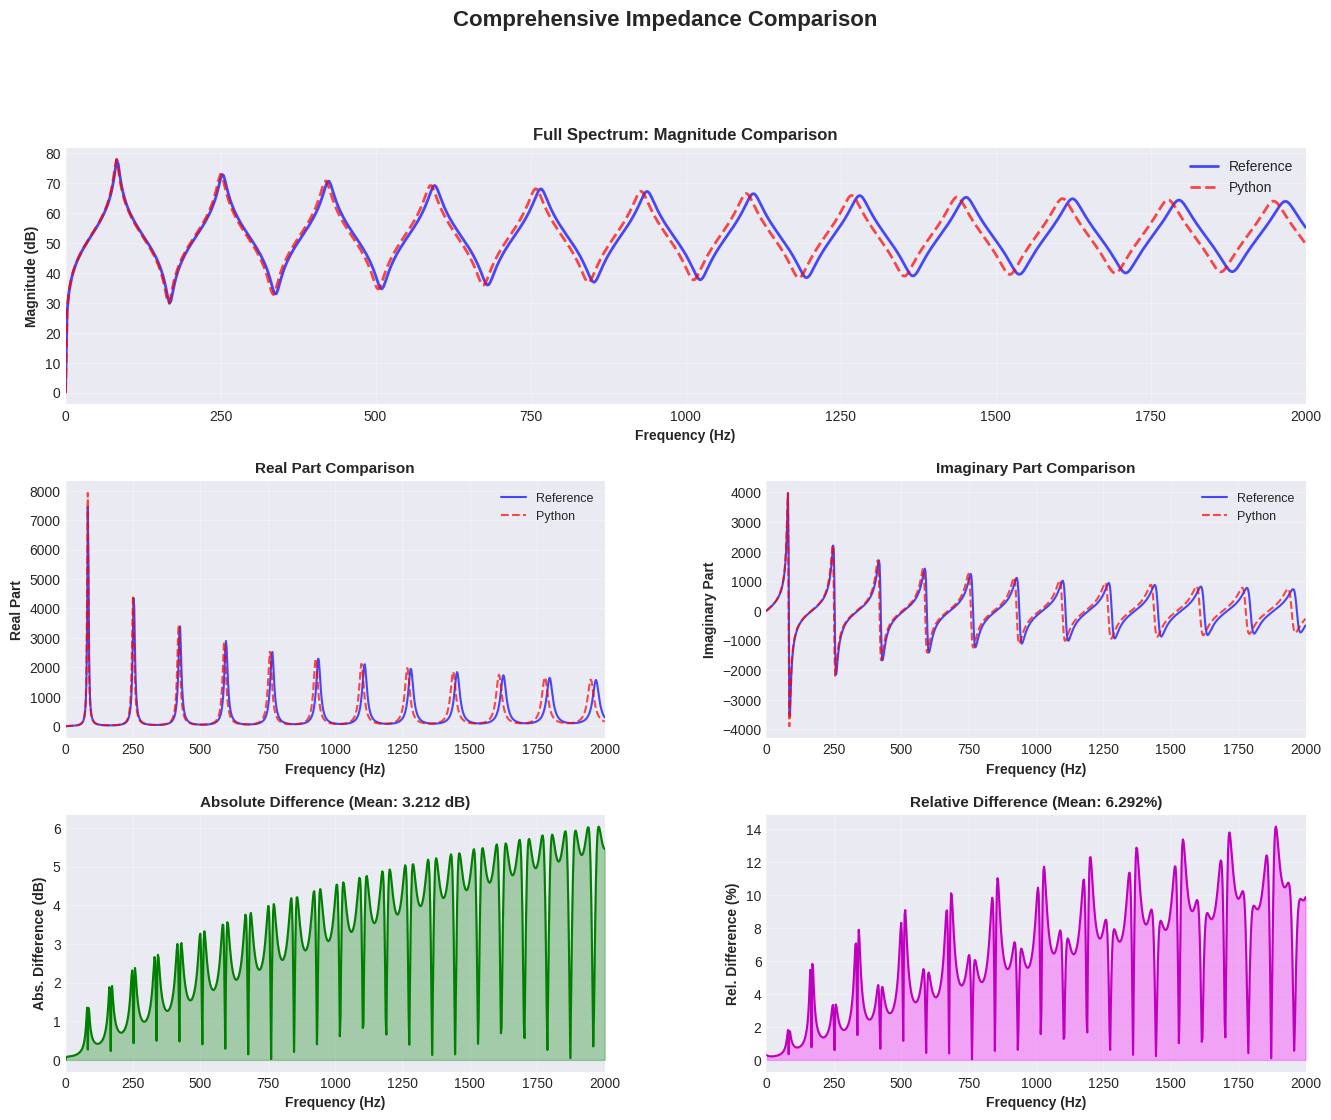

Plot saved as: impedance_comprehensive.png


In [ ]:
# Create comprehensive 4-panel plot
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Panel 1: Full magnitude comparison
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(ref_data['freq'], ref_data['mag'], 'b-', linewidth=2, label='Reference', alpha=0.7)
ax1.plot(py_data['freq'], py_data['mag'], 'r--', linewidth=2, label='Python', alpha=0.7)
ax1.set_xlabel('Frequency (Hz)', fontweight='bold')
ax1.set_ylabel('Magnitude (dB)', fontweight='bold')
ax1.set_title('Full Spectrum: Magnitude Comparison', fontweight='bold', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 2000)

# Panel 2: Real part comparison
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(ref_data['freq'], ref_data['imp.real'], 'b-', linewidth=1.5, label='Reference', alpha=0.7)
ax2.plot(py_data['freq'], py_data['imp.real'], 'r--', linewidth=1.5, label='Python', alpha=0.7)
ax2.set_xlabel('Frequency (Hz)', fontweight='bold')
ax2.set_ylabel('Real Part', fontweight='bold')
ax2.set_title('Real Part Comparison', fontweight='bold', fontsize=11)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 2000)

# Panel 3: Imaginary part comparison
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(ref_data['freq'], ref_data['imp.imag'], 'b-', linewidth=1.5, label='Reference', alpha=0.7)
ax3.plot(py_data['freq'], py_data['imp.imag'], 'r--', linewidth=1.5, label='Python', alpha=0.7)
ax3.set_xlabel('Frequency (Hz)', fontweight='bold')
ax3.set_ylabel('Imaginary Part', fontweight='bold')
ax3.set_title('Imaginary Part Comparison', fontweight='bold', fontsize=11)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, 2000)

# Panel 4: Absolute difference
ax4 = fig.add_subplot(gs[2, 0])
ax4.plot(ref_data['freq'], abs_diff, 'g-', linewidth=1.5)
ax4.fill_between(ref_data['freq'], 0, abs_diff, alpha=0.3, color='green')
ax4.set_xlabel('Frequency (Hz)', fontweight='bold')
ax4.set_ylabel('Abs. Difference (dB)', fontweight='bold')
ax4.set_title(f'Absolute Difference (Mean: {abs_diff.mean():.3f} dB)', fontweight='bold', fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 2000)

# Panel 5: Relative difference
ax5 = fig.add_subplot(gs[2, 1])
ax5.plot(ref_data['freq'], rel_diff, 'm-', linewidth=1.5)
ax5.fill_between(ref_data['freq'], 0, rel_diff, alpha=0.3, color='magenta')
ax5.set_xlabel('Frequency (Hz)', fontweight='bold')
ax5.set_ylabel('Rel. Difference (%)', fontweight='bold')
ax5.set_title(f'Relative Difference (Mean: {rel_diff.mean():.3f}%)', fontweight='bold', fontsize=11)
ax5.grid(True, alpha=0.3)
ax5.set_xlim(0, 2000)

fig.suptitle('Comprehensive Impedance Comparison', fontsize=16, fontweight='bold', y=0.995)

# plt.savefig('impedance_comprehensive.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Plot saved as: impedance_comprehensive.png")

## Conclusion

The comparison shows that the Python binding produces results that are very close to the reference implementation, with small numerical differences that are typical in floating-point calculations across different implementations.